In [1]:
import numpy as np
from PIL import Image

# Carica l'immagine usando PIL
image = Image.open('luna.png').convert('L')  # Converti in scala di grigi
image_array = np.array(image)  # Converti l'immagine in un array NumPy

# Definisci il filtro 3x3 di media pesata
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9

# Crea un'immagine vuota per il risultato
output_array = np.zeros_like(image_array, dtype=np.float32)

# Applica la convoluzione manualmente
height, width = image_array.shape
for i in range(1, height - 1):  # Ignora i bordi
    for j in range(1, width - 1):
        # Estrai la regione 3x3
        region = image_array[i-1:i+2, j-1:j+2]
        # Applica il kernel
        output_array[i, j] = np.sum(region * kernel)

# Converti l'output in un formato adatto per salvare come immagine
output_array = np.clip(output_array, 0, 255).astype(np.uint8)

# Salva l'immagine filtrata
output_image = Image.fromarray(output_array)
output_image.save('immagine_filtrata.jpg')

# Mostra l'immagine filtrata (opzionale)
output_image.show()

255


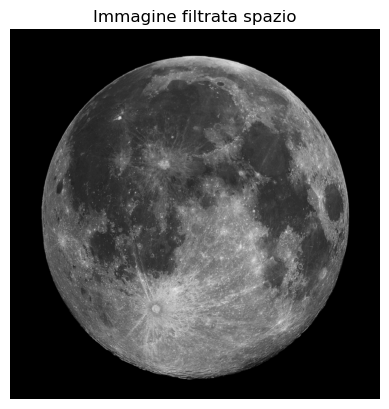

255.0


<Figure size 640x480 with 0 Axes>

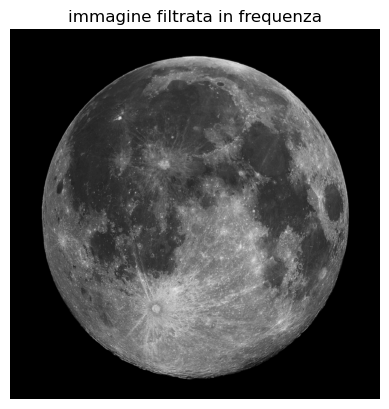

255.0


<Figure size 640x480 with 0 Axes>

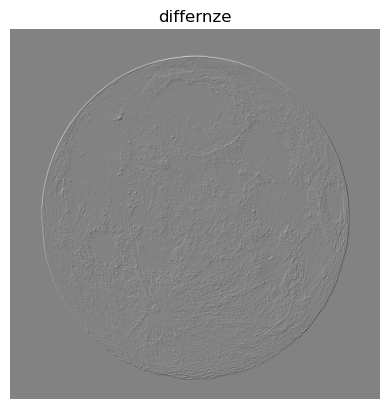

differenza media=  -4.863585776863522e-15


(array([6.1920e+04, 4.7890e+04, 4.0560e+04, 3.8053e+04, 2.8257e+04,
        2.4274e+04, 2.0911e+04, 2.0251e+04, 1.5539e+04, 1.3559e+04,
        1.3435e+04, 1.0583e+04, 9.1320e+03, 8.0050e+03, 7.9090e+03,
        6.2520e+03, 5.4870e+03, 5.2360e+03, 4.1160e+03, 3.6820e+03,
        3.3860e+03, 3.3560e+03, 2.5880e+03, 2.2890e+03, 2.2620e+03,
        1.8580e+03, 1.5710e+03, 1.4200e+03, 1.4370e+03, 1.1360e+03,
        1.0360e+03, 1.0460e+03, 7.6700e+02, 7.8700e+02, 6.4700e+02,
        7.0100e+02, 5.6400e+02, 5.1600e+02, 5.4000e+02, 4.0900e+02,
        3.6600e+02, 3.1600e+02, 3.1900e+02, 2.5800e+02, 2.5500e+02,
        2.1100e+02, 2.4800e+02, 1.8000e+02, 1.9200e+02, 1.6900e+02,
        1.2700e+02, 1.3300e+02, 1.4100e+02, 1.4300e+02, 1.0300e+02,
        1.0500e+02, 8.3000e+01, 1.1200e+02, 9.9000e+01, 8.9000e+01,
        6.7000e+01, 7.1000e+01, 7.2000e+01, 7.4000e+01, 5.6000e+01,
        5.7000e+01, 5.1000e+01, 7.9000e+01, 7.0000e+01, 5.5000e+01,
        6.8000e+01, 5.2000e+01, 5.8000e+01, 5.60

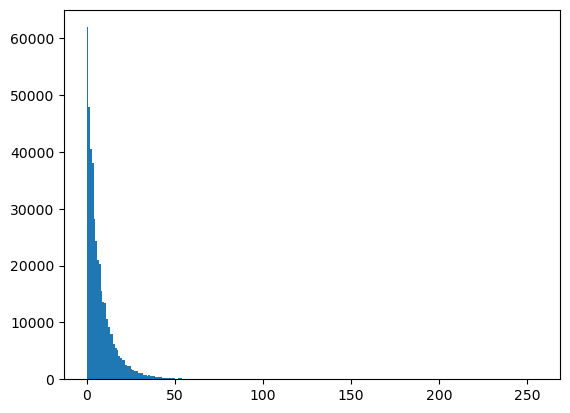

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from PIL import Image


image = Image.open('luna.png').convert('L')  # Converti in scala di grigi
def fft_image(img):
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)  # Sposta la componente a bassa frequenza al centro
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Evita log(0)
    
    # Mostra i risultati
    return fshift

def ifft_image(fft_img):
    # Inverso della FFT: Calcola la trasformata inversa
    f_ishift = np.fft.ifftshift(fft_img)  # Riporta la componente a bassa frequenza
    img_back = np.fft.ifft2(f_ishift)    # Calcola la trasformata inversa 2D
    
    # La funzione ifft2 restituisce numeri complessi, quindi prendiamo solo la parte reale
    img_back = np.abs(img_back)
    
    # Mostra i risultati
    
    plt.show()
    return img_back

def weighted_average_filter(img):
    # Definizione del filtro media pesata 3x3
    kernel = np.array([[1, 1, 1],
                        [1, 1, 1],
                        [1, 1, 1]])
    
    # Applicazione della convoluzione
    filtered_img = convolve2d(img, kernel, mode='same', boundary='fill', fillvalue=0)
    filtered_img = filtered_img / np.max(filtered_img) * 255
    filtered_img = np.clip(filtered_img, 0, 255)  # Assicurati che i valori siano nell'intervallo corretto
    plt.figure()
    plt.title("Immagine filtrata spazio")
    plt.imshow(filtered_img, cmap='gray')
    plt.axis("off")
    plt.show()
    
    return filtered_img

def zero_pad_image(img, n,m):
    # Ottieni le dimensioni originali
    original_size = img.shape
    newsize = (original_size[0] + n, original_size[1] + m)
    # Crea un'immagine con zero-padding
    padded_img = np.zeros(newsize, dtype=np.uint8)
    padded_img[:original_size[0], :original_size[1]] = img

    return padded_img



def apply_matched_filter(img, filter_full):
    # Calcola la FFT dell'immagine e del filtro
    f_img = fft_image(img)
    f_filter = fft_image(filter_full)
    
    # Moltiplica i due spettri
    f_output = f_img * f_filter
    
    # Calcola l'immagine filtrata
    output=ifft_image(f_output)
    output = output / np.max(output) * 255
    output = np.clip(output, 0, 255)  # Assicurati che i valori siano nell'intervallo corretto
    #trasforma in numeri inter
    plt.figure()
    plt.figure()
    plt.title("immagine filtrata in frequenza")
    plt.imshow(output, cmap='grey')
    plt.axis("off")
    plt.show()
    
    return output



img = cv2.imread('luna.png', cv2.IMREAD_GRAYSCALE)
print(img.max())
filtered_img = weighted_average_filter(img)
print(filtered_img.max())


img = cv2.imread('luna.png', cv2.IMREAD_GRAYSCALE)
padded_img = zero_pad_image(img, 2, 2)
filter_full = np.array([[1, 1, 1],
                        [1, 1, 1],
                        [1, 1, 1]])

padded_filter=zero_pad_image(filter_full, img.shape[0]-1, img.shape[1]-1)

image_back=apply_matched_filter(padded_img, padded_filter)
print(image_back.max())
#croppa img back to 1200x1200
image_back=image_back[:1200,:1200]



difference=filtered_img-image_back
#normalizza



plt.figure()
plt.figure()
plt.title("differnze")
plt.imshow(difference, cmap='grey') #use a colormap that goes from blue to red
plt.axis("off")
plt.show()


print("differenza media= ",difference.mean())
#print the histogram
plt.hist(difference.ravel(),256,[0,256])


